In [284]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [285]:
df = pd.read_csv("loan_approved_dataset.csv")

In [286]:
df.head()

,age,income,balance,target
0,45.960570,63892.663213,NaN,0
1,38.340828,78641.249607,2924.633683,1
2,47.772262,29021.486393,2059.630370,0
3,58.276358,58444.538550,1353.063222,0
4,37.190160,40240.361463,2698.223314,0


In [287]:
df.shape

(500, 4)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      490 non-null    float64
 1   income   490 non-null    float64
 2   balance  490 non-null    float64
 3   target   500 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.8 KB


In [289]:
df.duplicated().sum()

np.int64(0)

In [290]:
df.isna().sum()

age        10
income     10
balance    10
target      0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

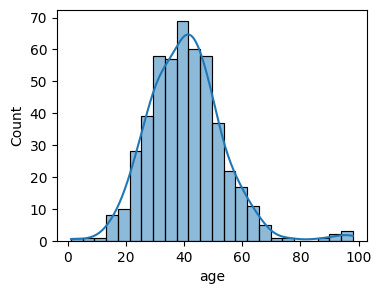

In [291]:
plt.figure(figsize=(4,3))
sns.histplot(df['age'], kde=True)

<Axes: ylabel='age'>

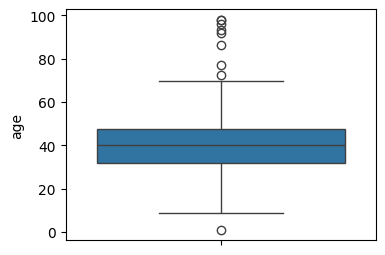

In [292]:
plt.figure(figsize=(4,3))
sns.boxplot(df['age'])

<Axes: xlabel='income', ylabel='Count'>

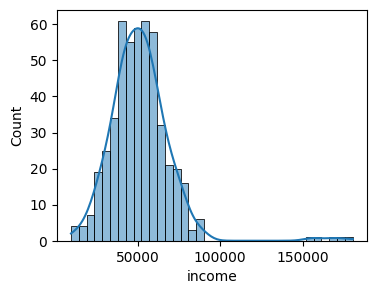

In [293]:
plt.figure(figsize=(4,3))
sns.histplot(df['income'], kde=True)

<Axes: ylabel='income'>

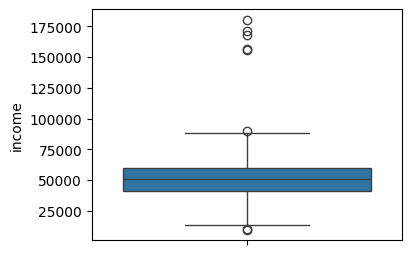

In [294]:
plt.figure(figsize=(4,3))
sns.boxplot(df['income'])

<Axes: xlabel='balance', ylabel='Count'>

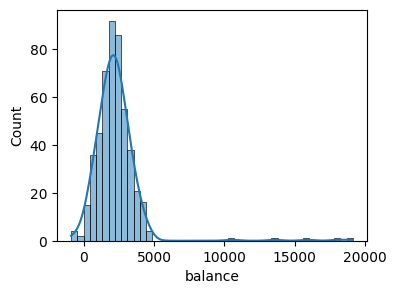

In [295]:
plt.figure(figsize=(4,3))
sns.histplot(df['balance'], kde=True)

<Axes: ylabel='balance'>

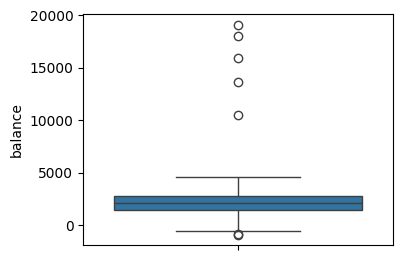

In [296]:
plt.figure(figsize=(4,3))
sns.boxplot(df['balance'])

In [297]:
#removing outlier
q1_a = df['age'].quantile(.25)
q3_a = df['age'].quantile(.75)

In [298]:
iqr_a = q3_a - q1_a

In [299]:
low_wh_a = q1_a - 1.5 * iqr_a
up_wh_a = q3_a + 1.5 * iqr_a

In [300]:
print(low_wh_a, up_wh_a)

7.411367068219402 71.97769926572704


In [301]:
df[df['age'] > up_wh_a]

,age,income,balance,target
79,98.000000,67156.310648,NaN,1
135,93.000000,25177.149922,2964.087168,1
179,72.642030,69073.326425,896.410683,0
209,86.232778,75446.845524,3749.576743,0
238,92.000000,74982.116667,2568.983079,0
297,96.000000,60222.510461,1709.725456,0
405,98.000000,50696.548222,1243.204911,0
478,76.946570,26241.457648,1112.507822,0


In [302]:
df[df['age'] < low_wh_a]

,age,income,balance,target
262,1.104792,88401.268074,2538.755992,0


In [303]:
def outlier(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    
    iqr = q3 - q1

    lower_wh = q1 - 1.5 * iqr
    upper_wh = q3 + 1.5 * iqr

    return df[(df[col] >= lower_wh) & (df[col] <= upper_wh)]

In [318]:
nums_col = ['age', 'income', 'balance']

In [319]:
df_clean = df.copy()

In [320]:
for col1 in nums_col:
    df_clean = outlier(df_clean, col1)

In [323]:
df = df_clean.copy()

In [325]:
df.shape

(447, 4)

In [326]:
df.isna().sum()

age        0
income     0
balance    0
target     0
dtype: int64

<Axes: ylabel='age'>

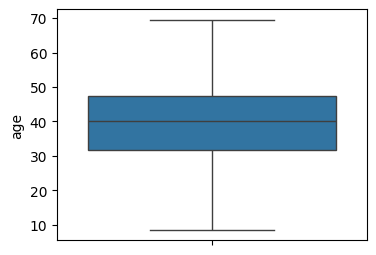

In [327]:
plt.figure(figsize=(4,3))
sns.boxplot(df['age'])

<Axes: ylabel='income'>

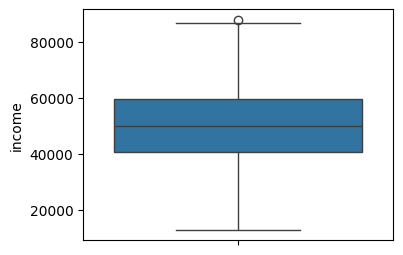

In [328]:
plt.figure(figsize=(4,3))
sns.boxplot(df['income'])

<Axes: ylabel='balance'>

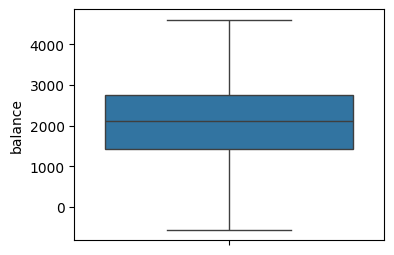

In [329]:
plt.figure(figsize=(4,3))
sns.boxplot(df['balance'])

In [330]:
df.duplicated().sum()

np.int64(0)

In [332]:
df = df.rename(columns={'target':'approved'})

In [333]:
df.head(1)

,age,income,balance,approved
1,38.340828,78641.249607,2924.633683,1


<Axes: xlabel='approved'>

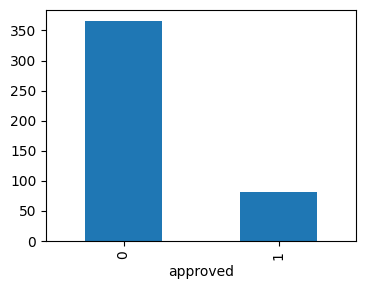

In [335]:
plt.figure(figsize=(4,3))
df['approved'].value_counts().plot(kind='bar')

<Axes: xlabel='age', ylabel='approved'>

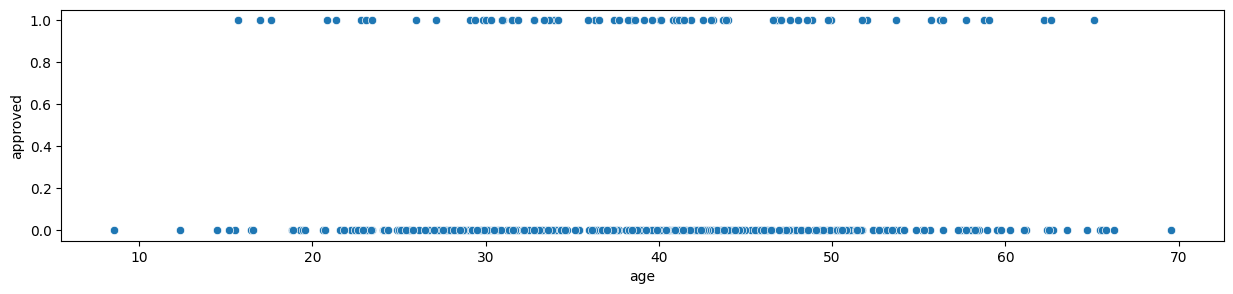

In [338]:
#visulaization
plt.figure(figsize=(15,3))
sns.scatterplot(x='age', y='approved', data=df)

<Axes: xlabel='income', ylabel='approved'>

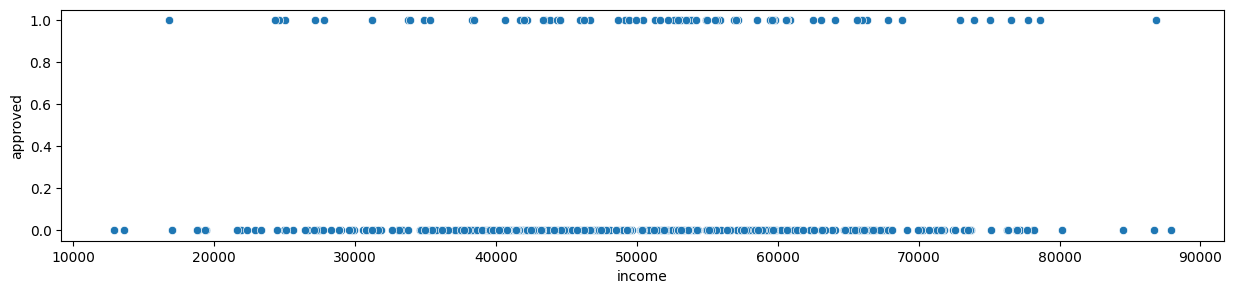

In [339]:
plt.figure(figsize=(15,3))
sns.scatterplot(x='income', y='approved', data=df)

<Axes: xlabel='balance', ylabel='approved'>

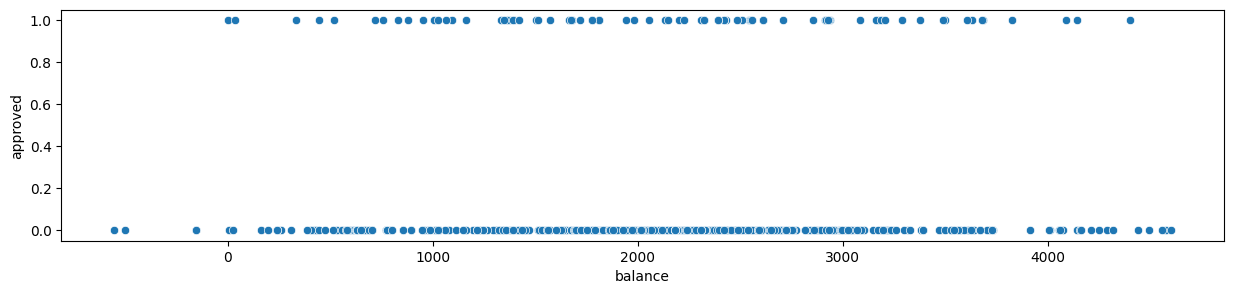

In [340]:
plt.figure(figsize=(15,3))
sns.scatterplot(x='balance', y='approved', data=df)

In [341]:
df.columns

Index(['age', 'income', 'balance', 'approved'], dtype='object')

In [343]:
#feature / target
x = df[['age', 'income', 'balance']]
y = df[['approved']]

In [344]:
#train test split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [345]:
xtrain.head()

,age,income,balance
19,23.052356,61270.806851,2424.165946
70,44.336747,50276.275688,1953.079421
197,41.844701,31233.296354,2552.489954
280,41.362208,52665.515014,2133.540905
34,49.870539,40222.458383,1516.813538


In [346]:
ytrain.head()

,approved
19,0
70,0
197,1
280,1
34,0


In [ ]:
knnc = KNeighborsClassifier()

In [348]:
model = knnc.fit(xtrain, ytrain)

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [349]:
model.score(xtrain, ytrain)

0.84593837535014

In [350]:
model.score(xtest, ytest)

0.7777777777777778

In [352]:
pred_y = model.predict(xtest)

In [353]:
#CM
cm = confusion_matrix(ytest, pred_y)
cm

array([[69,  4],
       [16,  1]])

<Axes: >

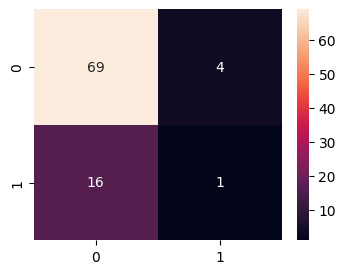

In [354]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True)

In [355]:
#cr
cr = classification_report(ytest, pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        73
           1       0.20      0.06      0.09        17

    accuracy                           0.78        90
   macro avg       0.51      0.50      0.48        90
weighted avg       0.70      0.78      0.73        90



In [356]:
accuracy_score(ytest, pred_y)

0.7777777777777778